In [2]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\T_U_I\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
%matplotlib inline

In [103]:
### BEGIN SOLUTION
data = pd.read_csv("tumor.csv", sep=',')

In [104]:
data.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [105]:
data.head()
data.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [106]:
#uneven data
data.Class.value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [107]:
#not necessary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data.Class)
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [108]:
X = data.drop('Class', axis=1)
y = data['Class']

In [109]:
#uneven dataset - stratify y for more balanced samples
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

In [110]:
smote = SMOTE(random_state=42)
X_smo, y_smo = smote.fit_resample(X_train, y_train)

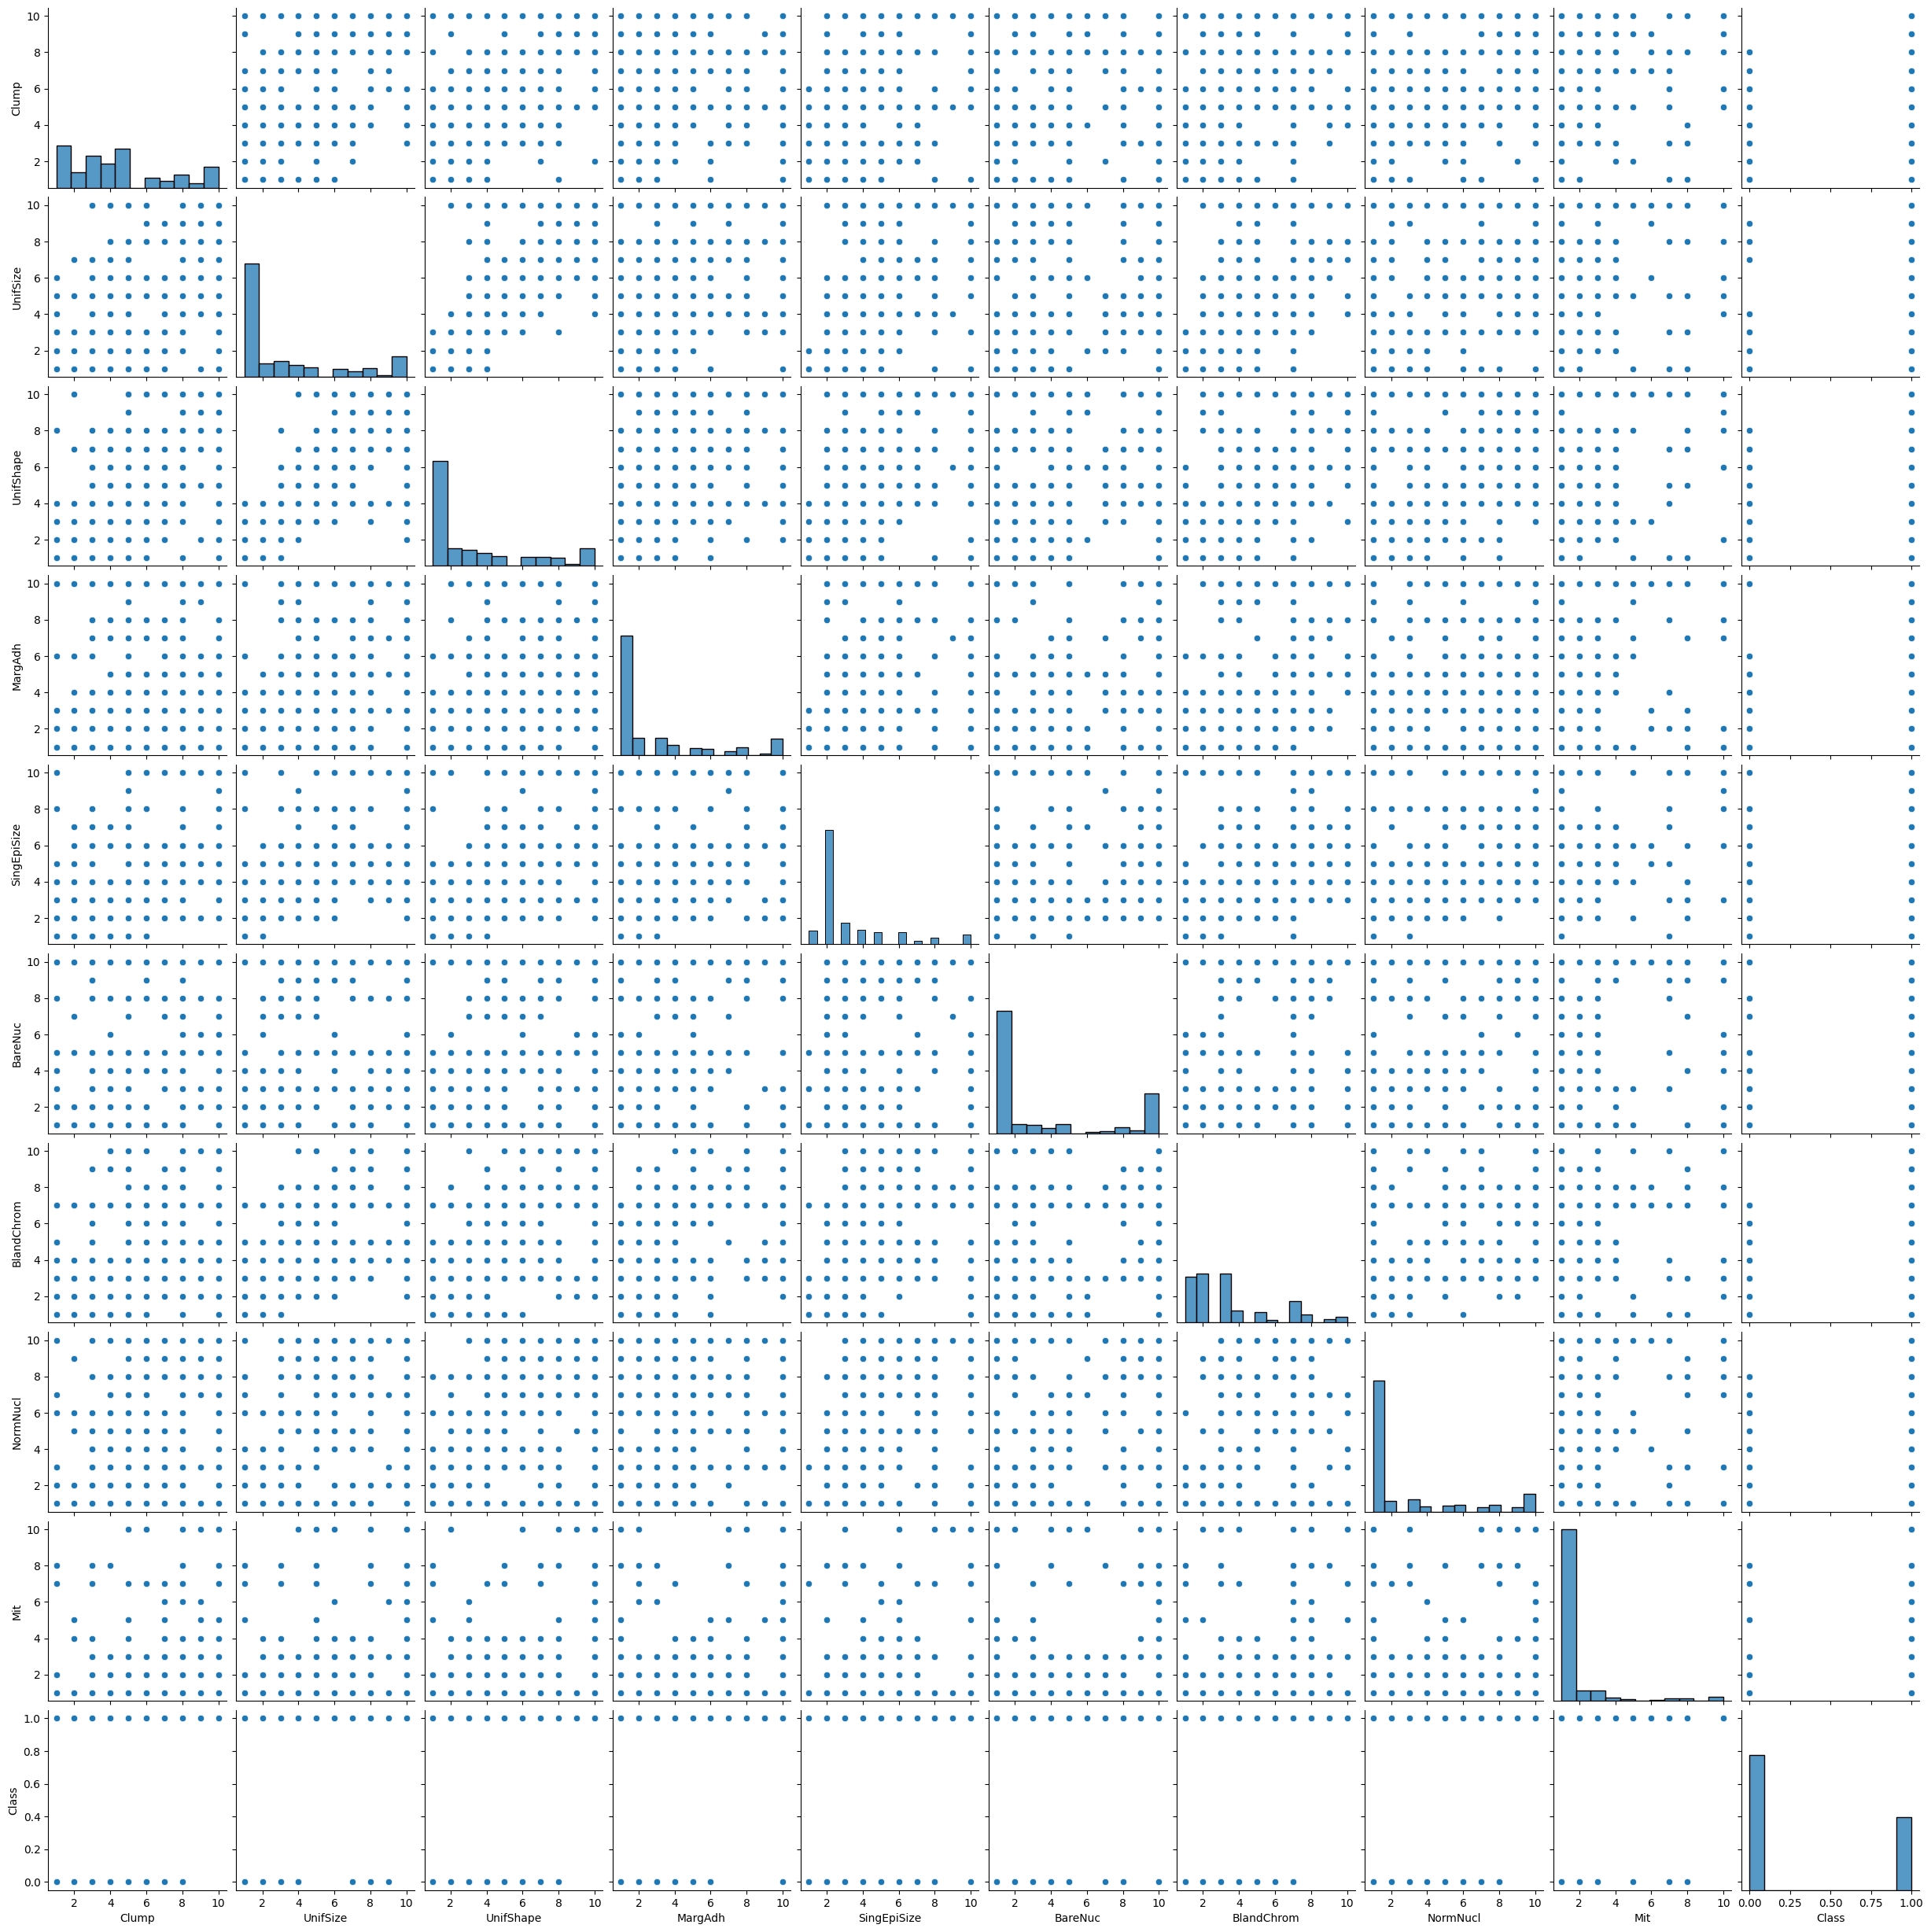

In [113]:
#pairplot
sns.pairplot(data)

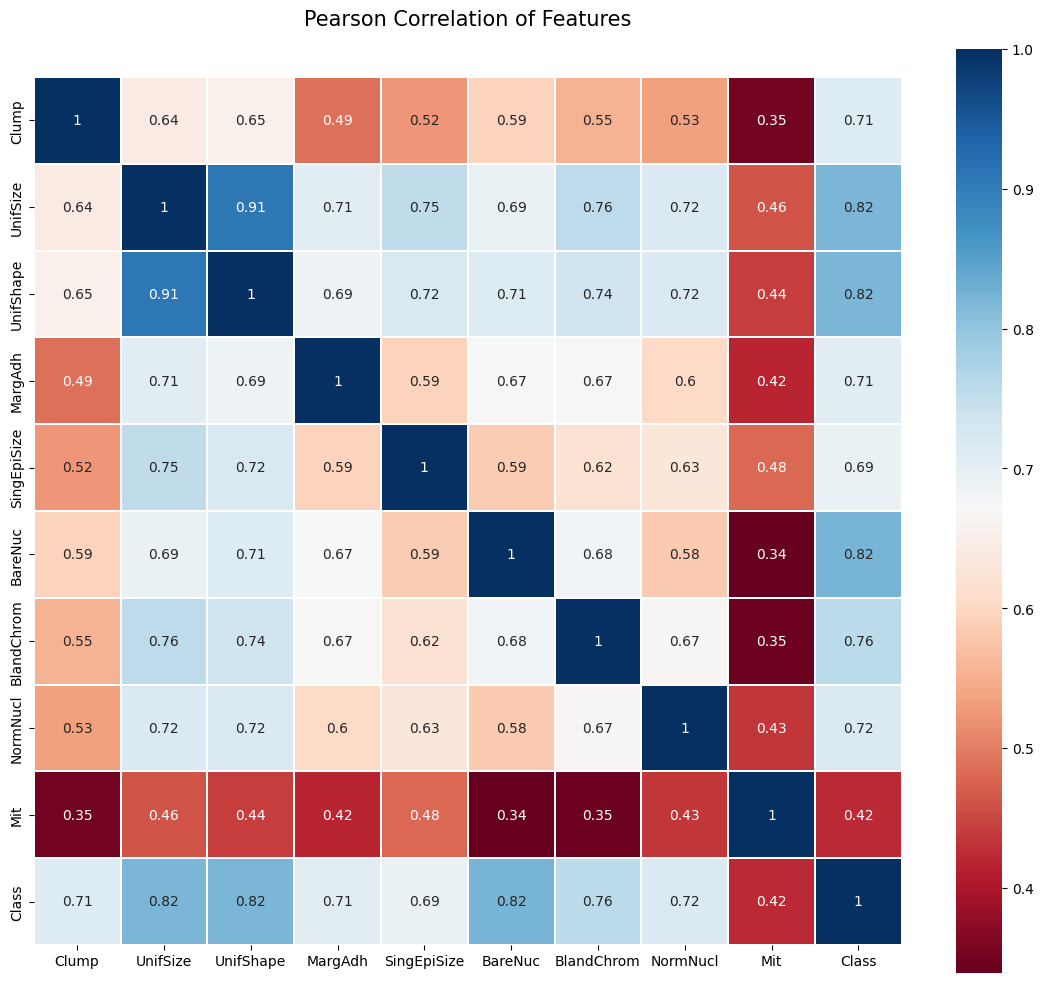

In [90]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

[(-1.0, 1.0), Text(0, 0.5, 'pearson correlation')]

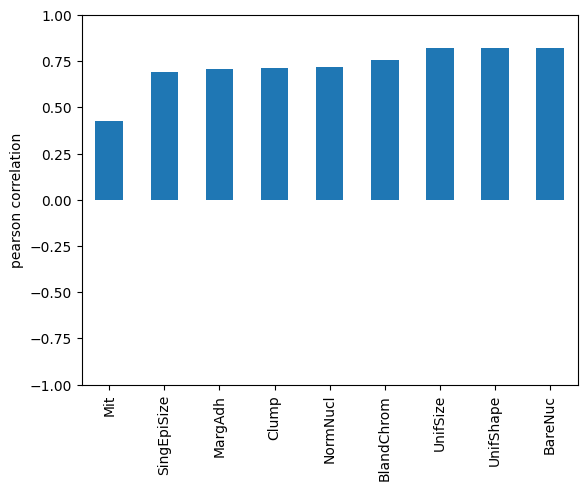

In [11]:
#correlation
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation')

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

lr2 = LogisticRegression(solver='liblinear')
parameters = [{'solver':['liblinear']},
              {'penalty':['l1', 'l2']},
              {'C':[0.01, 0.1, 1, 10, 100,1000]}]

grid_search = GridSearchCV(estimator = lr2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'solver': ['liblinear']}, {'penalty': ['l1', 'l2']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [66]:
grid_search.best_score_

0.9662451612903226

In [67]:
grid_search.best_params_

{'penalty': 'l1'}

In [68]:
y_pred = grid_search.predict(X_test)

In [36]:
def plot_distribution(y_test, y_pred, n_classes): 
    prediction_counts = [None] * n_classes 
    testing_counts = [None] * n_classes
    for i in range(n_classes):
        prediction_counts[i] = len(y_pred[y_pred == i])
        testing_counts[i] = len(y_test[y_test == i])

    test_bar = plt.bar(np.arange(n_classes)-0.2, testing_counts, align='center', color = 'g', alpha=0.75, width = 0.41, label = 'Testing')
    pred_bar = plt.bar(np.arange(n_classes)+0.2, prediction_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Prediction')
    
    plt.xlabel('Labels')
    plt.xticks((0,1))
    plt.ylabel('Count')
    plt.title('Label distribution in the training and test set')
    plt.legend(bbox_to_anchor=(1.05, 1), handles=[test_bar, pred_bar], loc=2)
    plt.grid(True)
    plt.show()

In [59]:
def print_metrics(y_test, y_pred):
    plot_distribution(y_test, y_pred, 2)
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
    auc = roc_auc_score(y_test, y_pred)
    disp = ConfusionMatrixDisplay(matrix)
    disp.plot()
    plt.show()
    print("True Positive: " , tp)
    print("True Negative: " , tn)
    print("False Positive: " , fp)
    print("False Negative: " , fn)
    print(f"Accuracy is: {accuracy:.2f}")
    print(f"Precision is: {precision:.2f}")
    print(f"Recall is: {recall:.2f}")
    print(f"Fscore is: {fbeta:.2f}")
    print(f"AUC is: {auc:.2f}")

In [72]:
def print_roc(grid_search, X_test, y_test):
    y_score = grid_search.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

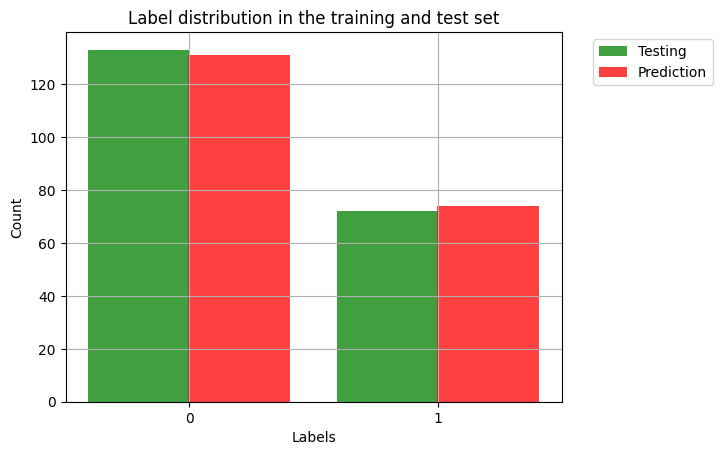

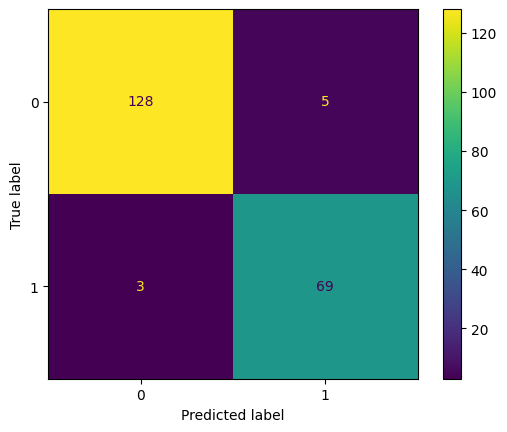

True Positive:  69
True Negative:  128
False Positive:  5
False Negative:  3
Accuracy is: 0.96
Precision is: 0.93
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96


In [60]:
print_metrics(y_test, y_pred)

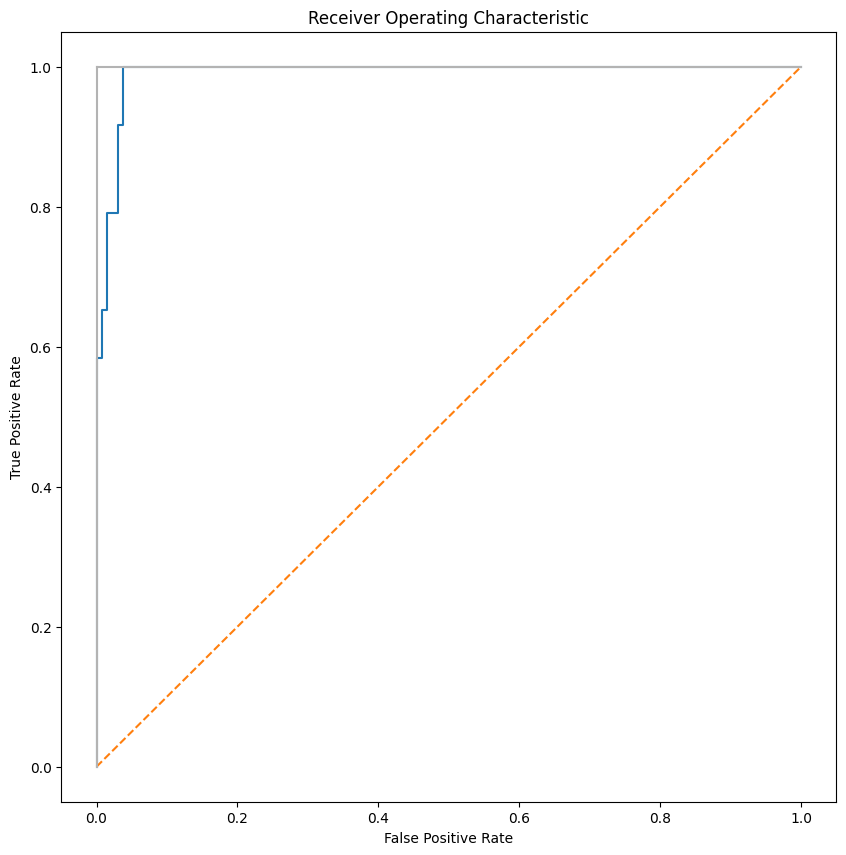

In [73]:
print_roc(grid_search, X_test, y_test)

In [31]:
# svc
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [75]:
from sklearn.svm import SVC

svc = SVC()
param_svc = [
  {'C': [0.01,0.1,1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.01,0.1,1, 10, 100, 1000], 'gamma': [0.01,0.001, 0.0001], 'kernel': ['rbf']},
]
grid_svc = GridSearchCV(estimator = svc,
                           param_grid = param_svc,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_svc.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy')

In [76]:
grid_svc.best_score_

0.9726709677419356

In [77]:
grid_svc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [49]:
y_svc = grid_svc.predict(X_test)

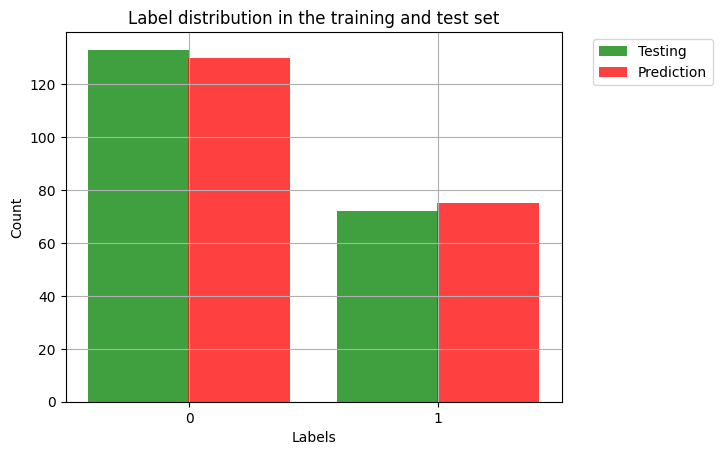

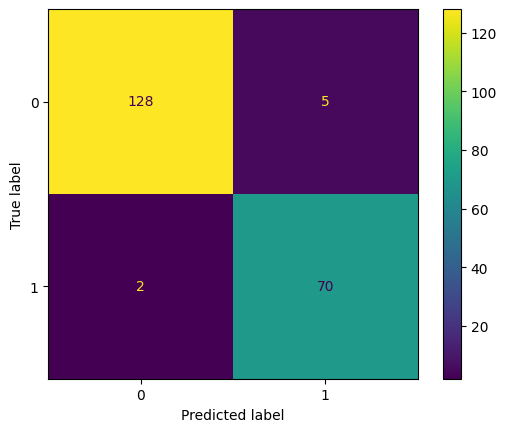

True Positive:  70
True Negative:  128
False Positive:  5
False Negative:  2
Accuracy is: 0.97
Precision is: 0.93
Recall is: 0.97
Fscore is: 0.97
AUC is: 0.97


In [61]:
print_metrics(y_test, y_svc)

In [80]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_smo, y_smo)
param_tree = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}
grid_tree = GridSearchCV(estimator = dt,
                           param_grid = param_tree,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_tree.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 9, 2),
                         'max_features': range(1, 10)},
             scoring='accuracy')

In [81]:
y_tree = grid_tree.predict(X_test)

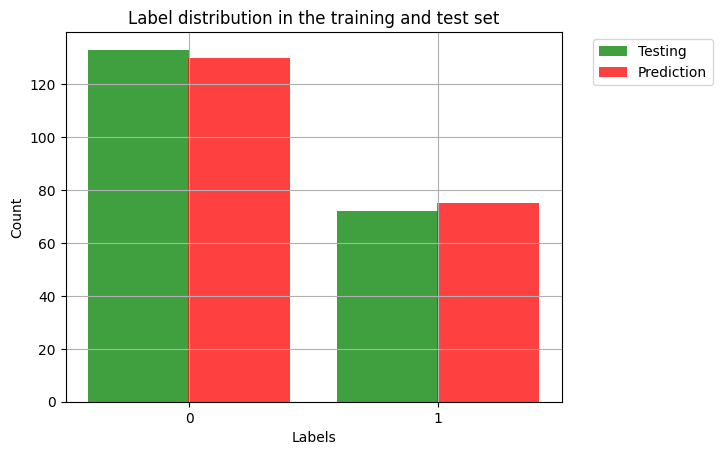

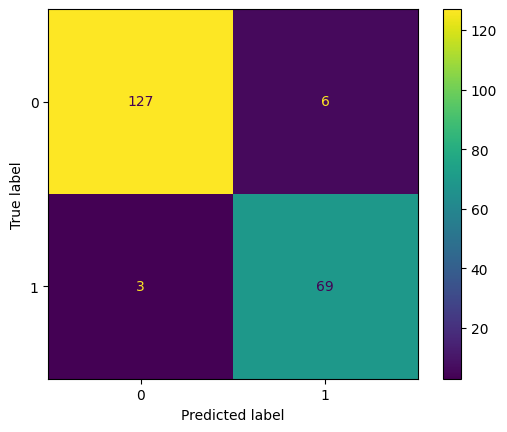

True Positive:  69
True Negative:  127
False Positive:  6
False Negative:  3
Accuracy is: 0.96
Precision is: 0.92
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96


In [83]:
print_metrics(y_test, y_tree)

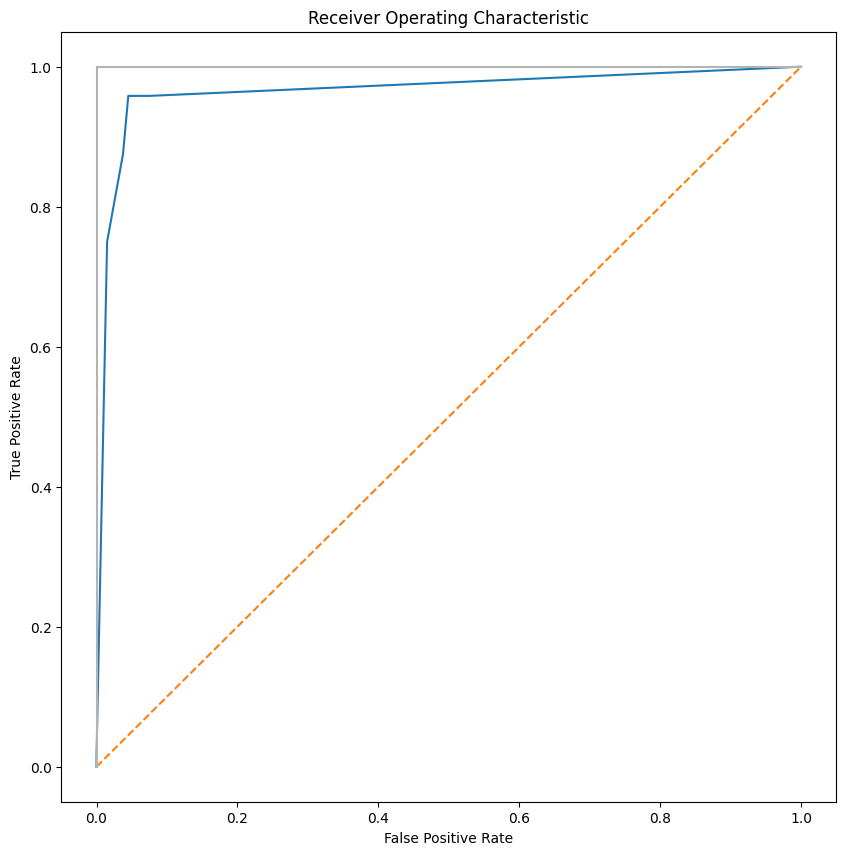

In [84]:
print_roc(grid_tree, X_test, y_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [85]:
param_rf = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}
param_rf = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}
grid_rf = GridSearchCV(estimator = dt,
                           param_grid = param_rf,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_rf.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 9, 2),
                         'max_features': range(1, 10)},
             scoring='accuracy')

In [87]:
y_rf = grid_rf.predict(X_test)

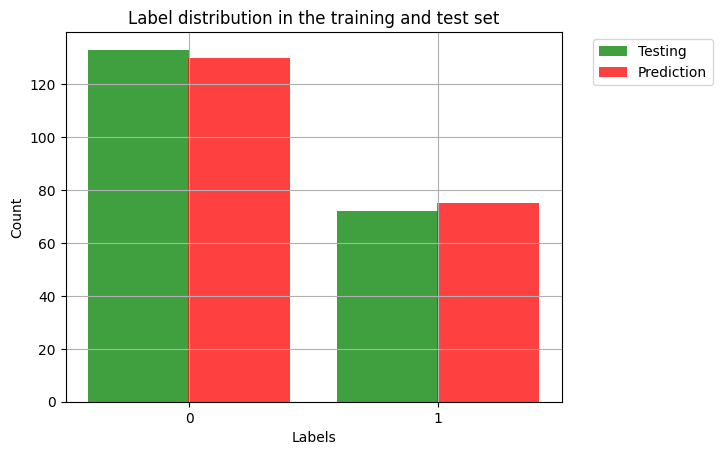

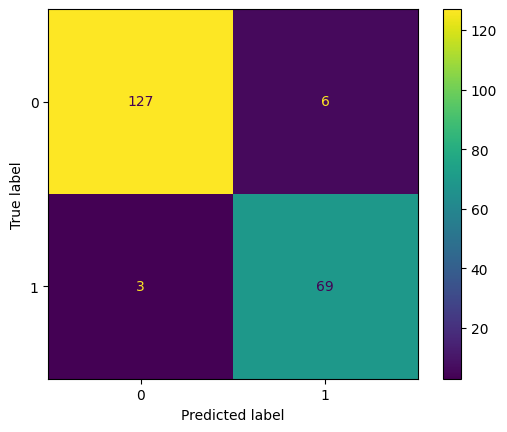

True Positive:  69
True Negative:  127
False Positive:  6
False Negative:  3
Accuracy is: 0.96
Precision is: 0.92
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96


In [88]:
print_metrics(y_test, y_rf)

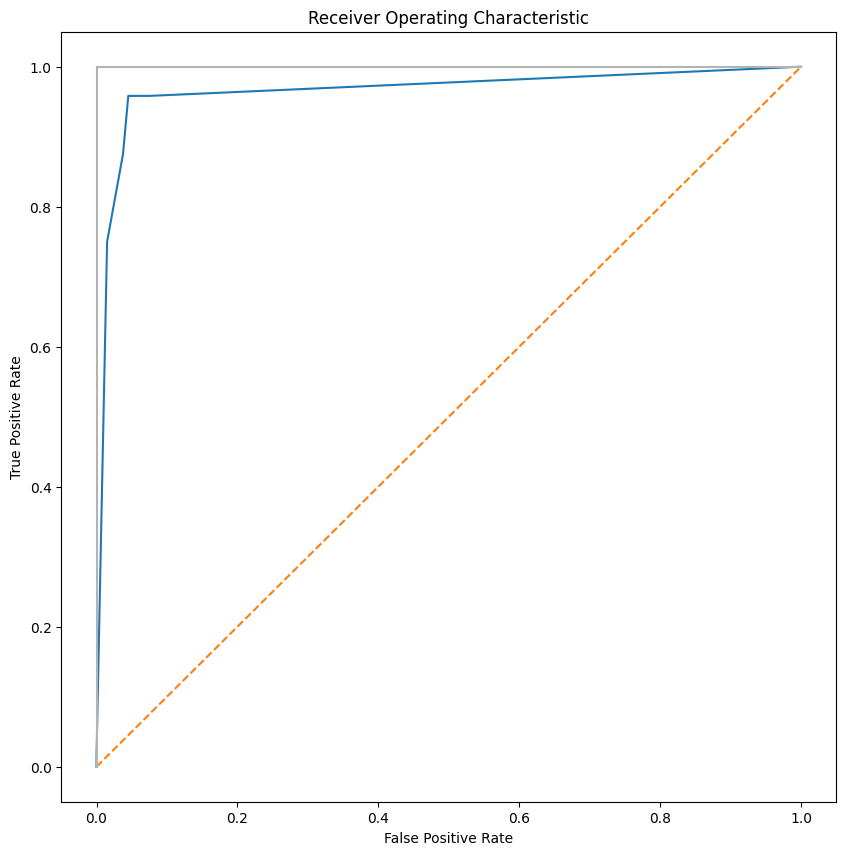

In [89]:
print_roc(grid_rf, X_test, y_test)

In [94]:
from sklearn.ensemble import StackingClassifier

estimators = [('logres', LogisticRegression(solver='liblinear')),('SVM',SVC(random_state=42)),('rf',RandomForestClassifier()),('dt',DecisionTreeClassifier())]
clf = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression())
clf.fit(X_smo, y_smo)

StackingClassifier(estimators=[('logres',
                                LogisticRegression(solver='liblinear')),
                               ('SVM', SVC(random_state=42)),
                               ('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [97]:
y_clf = clf.predict(X_test)

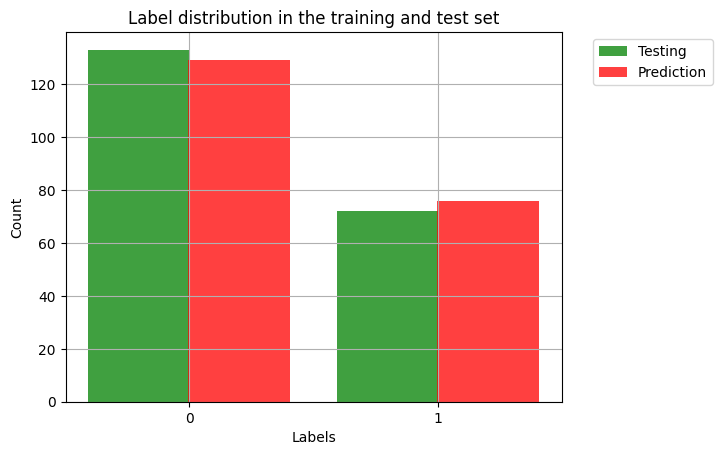

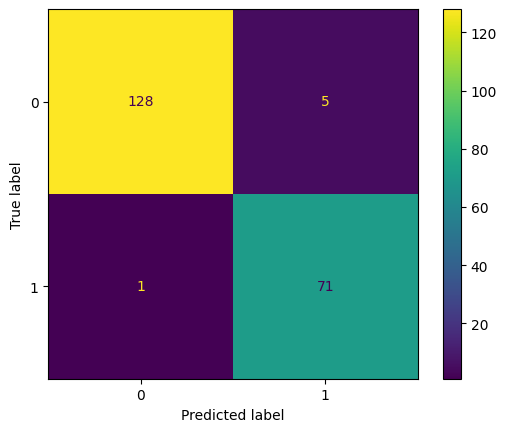

True Positive:  71
True Negative:  128
False Positive:  5
False Negative:  1
Accuracy is: 0.97
Precision is: 0.93
Recall is: 0.99
Fscore is: 0.98
AUC is: 0.97


In [98]:
print_metrics(y_test, y_clf)

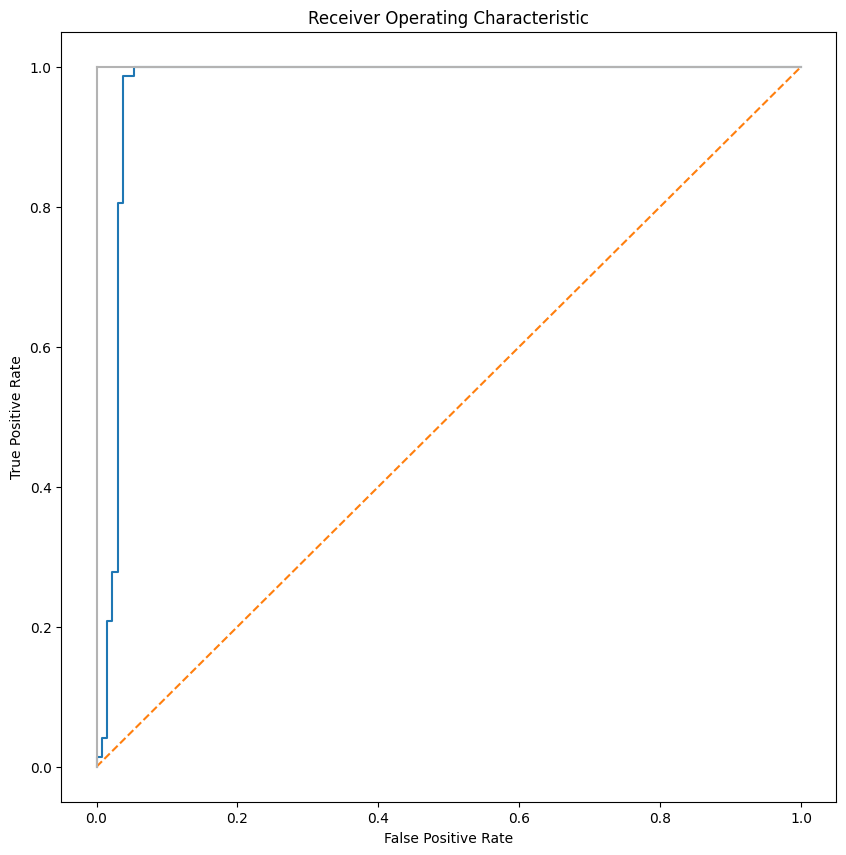

In [99]:
print_roc(clf, X_test, y_test)

In [123]:
y_test[y_test == 1]

52     1
589    1
97     1
468    1
553    1
      ..
326    1
473    1
412    1
15     1
642    1
Name: Class, Length: 72, dtype: int64

In [116]:
X_test.sum()

Clump          941
UnifSize       654
UnifShape      657
MargAdh        568
SingEpiSize    700
BareNuc        703
BlandChrom     717
NormNucl       621
Mit            316
dtype: int64